In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,cross_val_score,StratifiedShuffleSplit,cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.exceptions import DataConversionWarning
import warnings    
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
#from .molecule import Mol
#import rdkit.Chem.AllChem as AllChem
import matplotlib.pyplot as plt




<AxesSubplot:ylabel='Frequency'>

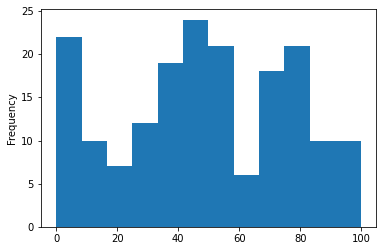

In [2]:
df_0=pd.read_csv('data/doyle_data.csv')
df_0['yield'].plot(kind='hist',bins=12)


In [2]:
df_2=pd.read_csv('data/suzuki_data.csv')
df_1=pd.read_csv('data/az_data.csv')





<AxesSubplot:ylabel='Frequency'>

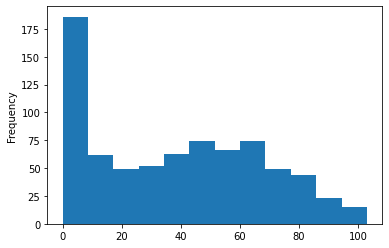

In [17]:
df_1['yield'].plot(kind='hist',bins=12)

<AxesSubplot:ylabel='Frequency'>

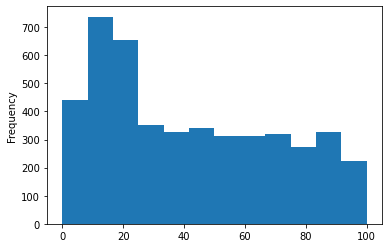

In [3]:
df_2['yield'].plot(kind='hist',bins=12)

In [11]:
#df=pd.read_csv('data/suzuki_data.csv')
df=pd.read_csv('data/az_data.csv')


In [12]:
ndf=df
ndf.drop('Unnamed: 0', axis=1, inplace=True)
ndf = ndf.astype(float)

data=ndf
y = data.pop('yield')
X = data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30,random_state = 2)

In [14]:
    
data=data.reindex(np.random.permutation(data.index))
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train ,y_train);


In [15]:
y_pred =rf.predict(X_train ) 
err =r2_score(y_train,y_pred)
print('Mean Absolute Train Error:', round(np.mean(err), 2))

Mean Absolute Train Error: 0.8


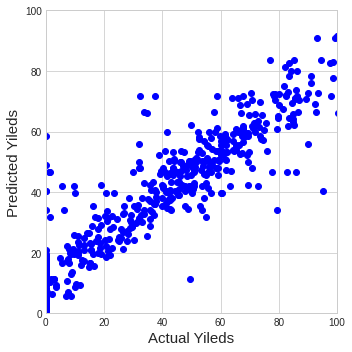

In [16]:
plt.style.use('seaborn-whitegrid')
#ax=plt.figure(figsize=(8,8))
fig, ax = plt.subplots(figsize=(5,5))
#ax=fig.add_axes([0,0,1,1])
ax.scatter(y_train, y_pred, color='b')
ax.set_xlabel('Actual Yileds',fontsize=15)
ax.set_ylabel('Predicted Yileds',fontsize=15)
ax.set_xlim([0,100])
ax.set_ylim([0,100])
plt.tight_layout()
#plt.savefig('data/true_vs_pred.png',dpi=300)
plt.show()

In [17]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors =r2_score(y_test,predictions )
# Print out the mean absolute error (mae)
print('Mean Absolute Test Error:', round(np.mean(errors), 2))


Mean Absolute Test Error: 0.28


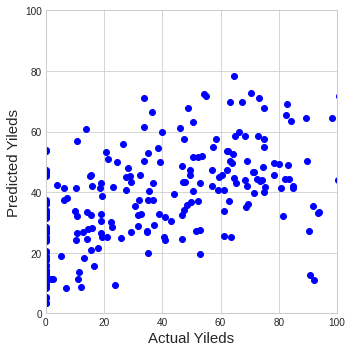

In [18]:
plt.style.use('seaborn-whitegrid')
#ax=plt.figure(figsize=(8,8))
fig, ax = plt.subplots(figsize=(5,5))
#ax=fig.add_axes([0,0,1,1])
ax.scatter(y_test, predictions, color='b')
ax.set_xlabel('Actual Yileds',fontsize=15)
ax.set_ylabel('Predicted Yileds',fontsize=15)
ax.set_xlim([0,100])
ax.set_ylim([0,100])
plt.tight_layout()
#plt.savefig('data/true_vs_pred.png',dpi=300)
plt.show()